In [37]:
cd /home/chenxupeng/projects/practice/

/home/chenxupeng/projects/practice


In [50]:
%pylab inline
from scipy import io
from scipy import misc
import cv2
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


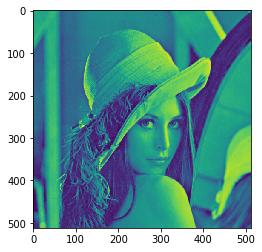

In [70]:
f = io.loadmat('lena512.mat')['lena512']
plt.imshow(f)

滤波器什么也没有做，得到的图像和原图是一样的。因为只有中心点的值是1。邻域点的权值都是0，对滤波后的取值没有任何影响。

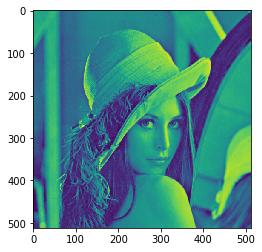

In [71]:
fil_nothing = np.array([[  0, 0, 0],    #filter
                        [  0, 1, 0],
                        [  0, 0, 0]])
res = cv2.filter2D(f,-1,fil_nothing)
plt.imshow(res)

#### 图像锐化滤波器Sharpness Filter
图像的锐化和边缘检测很像，首先找到边缘，然后把边缘加到原来的图像上面，这样就强化了图像的边缘，使图像看起来更加锐利了。这两者操作统一起来就是锐化滤波器了，也就是在边缘检测滤波器的基础上，再在中心的位置加1，这样滤波后的图像就会和原始的图像具有同样的亮度了，但是会更加锐利。

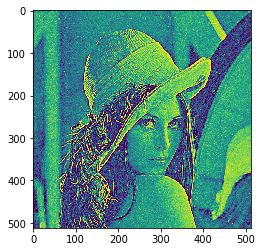

In [72]:
fil_sharp = np.array([[  -1, -1, -1],    #filter
                        [  -1, 9, -1],
                        [  -1, -1, -1]])
res = cv2.filter2D(f,-1,fil_sharp)
plt.imshow(res)

#### 边缘检测 
相当于离散版本的求导：将当前的像素值减去前一个像素值，这样就可以得到这个函数在这两个位置的差别或者斜率。
通过使用不同的卷积核，可以得到对不同方向敏感的边缘

In [74]:
#左右方向边缘
edge0 = np.zeros([5,5])
edge0[2,0] = -2
edge0[2,1] = -2
edge0[2,2] = 4
edge0

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [-2., -2.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

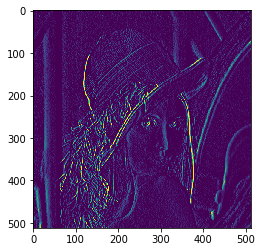

In [75]:
res = cv2.filter2D(f,-1,edge0)
plt.imshow(res)

In [76]:
# 上下方向边缘
edge1 = np.zeros([5,5])
edge1[0,2] = -1
edge1[1,2] = -1
edge1[3,2] = -1
edge1[4,2] = -1
edge1[2,2] = 4
edge1

array([[ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  4.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.]])

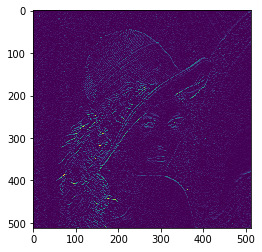

In [77]:
res = cv2.filter2D(f,-1,edge1)
plt.imshow(res)

In [78]:
#45度角方向
edge2 = np.zeros([5,5])
edge2[0,0] = -1
edge2[1,1] = -2
edge2[2,2] = 6
edge2[3,3] = -2
edge2[4,4] = -1
edge2

array([[-1.,  0.,  0.,  0.,  0.],
       [ 0., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  6.,  0.,  0.],
       [ 0.,  0.,  0., -2.,  0.],
       [ 0.,  0.,  0.,  0., -1.]])

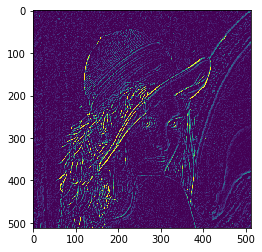

In [79]:
res = cv2.filter2D(f,-1,edge2)
plt.imshow(res)

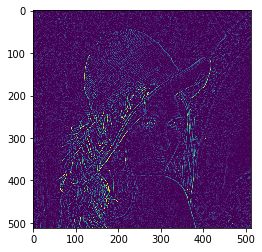

In [80]:
#所有方向轮廓
fil_sharp_1 = np.array([[  -1, -1, -1],    #filter
                        [  -1, 8, -1],
                        [  -1, -1, -1]])
res = cv2.filter2D(f,-1,fil_sharp_1)
plt.imshow(res)

#### 浮雕

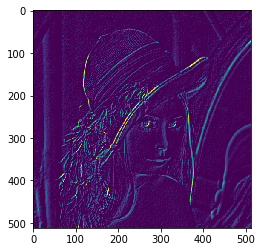

In [81]:
emboss_0 = np.array([[  -1, -1, 0],    #filter
                   [  -1, 0,  1],
                   [  0,  1,  1]])
res = cv2.filter2D(f,-1,emboss_0)
plt.imshow(res)

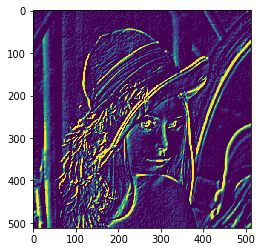

In [82]:
emboss_1 = np.array([[  -1, -1, -1, -1,  0],    #filter
                     [  -1, -1, -1,  0,  1],
                     [  -1, -1,  0,  1,  1],
                     [  -1,  0,  1,  1,  1],
                     [   0,  1,  1,  1,  1]])
res = cv2.filter2D(f,-1,emboss_1)
plt.imshow(res)

In [86]:
np.arange(2001,2012).astype('str')

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011'],
      dtype='|S21')